In [1]:
import sys
sys.path.append(r'..//')
from ioMicro import *

In [2]:
#sys.path.append(os.path.abspath('Human'))
#from workerScope3A_HttHuman_Snonia__06_12_2023 import *

In [103]:
save_folder =r'\\192.168.0.96\bbfish124\HttHuman_Snonia__08_03_2023\MERFISH_Analysis_group1'
save_folder = r'\\192.168.0.130\Papaya2\HttHuman_Snonia__08_03_2023\MERFISH_Analysis_group6'
fov,set_ = 'Conv_zscan__080', '_set5'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols=2
dec.load_decoded()

Loaded decoded: -2.0075201988220215


True

In [6]:
#apply_fine_drift(dec,plt_val=True)

In [106]:
XH = dec.XH_pruned
icodes = dec.icodesN
bad = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn]
good = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn]
is_good = np.in1d(icodes,good)
is_bad = np.in1d(icodes,bad)
Xcms = np.mean(XH[:],axis=1)
Xdif = XH-Xcms[:,np.newaxis]
dists = np.linalg.norm(Xdif[:,:,:3],axis=-1)
bad_dists = np.max(dists,axis=-1)
hmean = np.log(Xcms[:,-3])

array([0., 0., 0., ..., 1., 1., 1.])

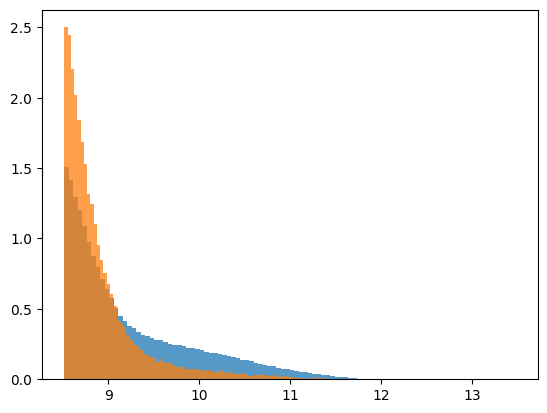

In [108]:
icols = XH[:,0,-2]
hmean = np.log(np.min(XH[:,:,-3],axis=1))
keep = bad_dists<1.5
plt.hist(hmean[is_good&keep][icols[is_good&keep]==0],bins=100,density=True,alpha=0.75);
plt.hist(hmean[is_bad&keep][icols[is_bad&keep]==0],bins=100,density=True,alpha=0.75);

In [101]:
keep = (hmean>9.25)&(bad_dists<1.)
np.mean(is_good&keep)/np.mean(is_bad&keep)
def plot_multigenes(self,genes=['Gad1','Sox9'],colors=['r','g','b','m','c','y','w'],smin=3,smax=10,viewer = None,
                    drift=[0,0,0],resc=[1,1,1]):
    icodesN,XH_pruned = self.icodesN,self.XH_pruned
    scoreA=self.scoreA
    th=self.th
    gns_names = list(self.gns_names)
    
    Xcms = np.mean(XH_pruned,axis=1)
    keep = scoreA>th
    X = (Xcms[:,:3][keep]-drift)/resc  
    H = scoreA[keep]
    H -= np.min(H)
    icodesf = icodesN[keep]
    size = smin+np.clip(H/np.max(H),0,1)*(smax-smin)
    
    if viewer is None:
        import napari
        viewer = napari.Viewer()
    for igene,gene in enumerate(genes):
        color= colors[igene%len(colors)]
        icode = gns_names.index(gene)
        is_code = icode==icodesf
        viewer.add_points(X[is_code],size=size[is_code],face_color=color,name=gene)

    return viewer

19.74526586544858

In [105]:
keep = (dec.scoreA>-0.5)
np.sum(keep&is_good)/np.mean(is_bad&keep)

ValueError: operands could not be broadcast together with shapes (1715630,) (3113113,) 

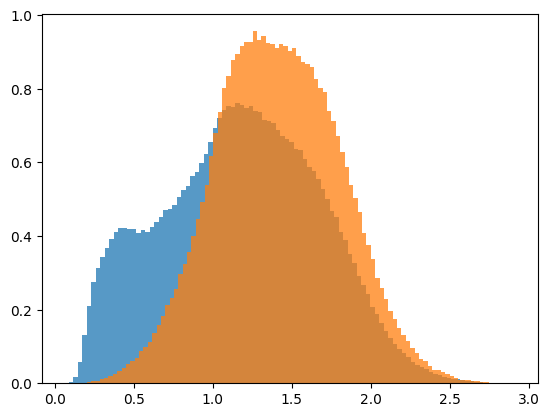

In [110]:
keep = bad_dists<100
plt.hist(bad_dists[is_good&keep],bins=100,density=True,alpha=0.75);
plt.hist(bad_dists[is_bad&keep],bins=100,density=True,alpha=0.75);

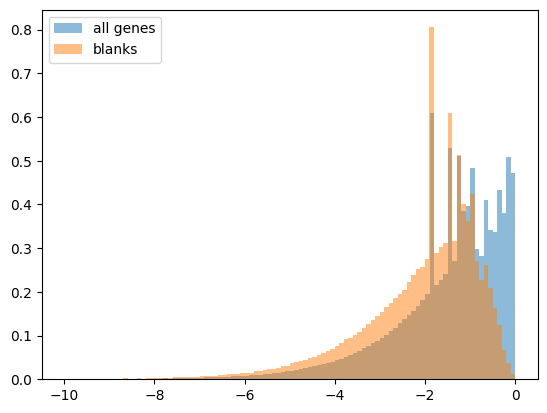

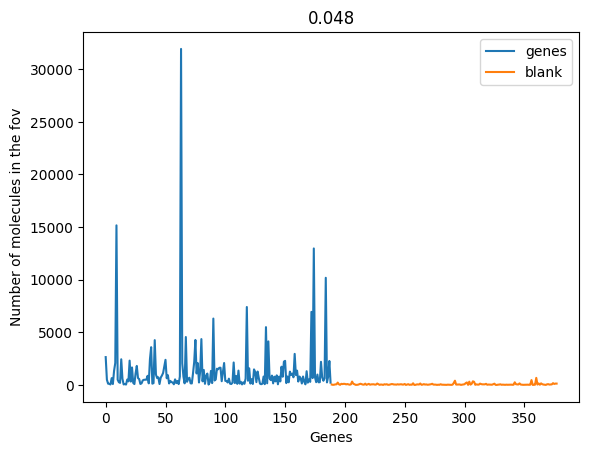

In [104]:
scoresRefT = get_score_per_color(dec)
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-10)
dec.th=-0.5
plot_statistics(dec)

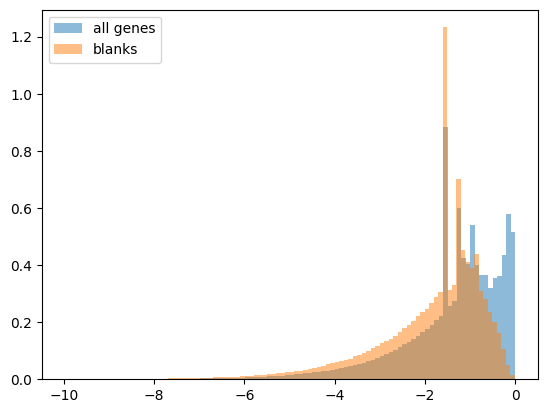

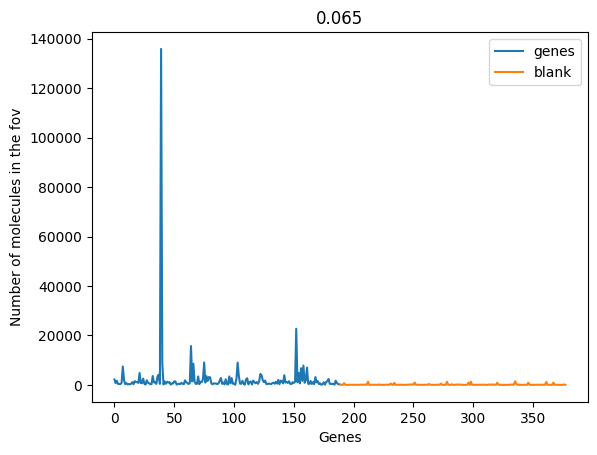

In [8]:
scoresRefT = get_score_per_color(dec)
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None,th_min=-10)
dec.th=-0.5
plot_statistics(dec)

In [9]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
print(list(np.array(dec.gns_names)[icds[np.argsort(ncds)[::-1]]]))

['GFAP', 'SPARCL1', 'KIF1A', 'MAP2', 'PEA15', 'GPRC5B', 'KIF5C', 'STMN3', 'CKB', 'SYT1', 'SRRM2', 'SREBF2', 'DYNC1H1', 'QDPR', 'GABBR1', 'SEPW1', 'RAB3A', 'PFKP', 'FBXO2', 'MAP4', 'LINGO1', 'NLRP3', 'FTL', 'MARCKSL1', 'TMSB10', 'MID1IP1', 'MYH9', 'NRXN3', 'PPP2R2B', 'EIF1', 'PBX1', 'USP5', 'MAOB', 'NGFRAP1', 'PON2', 'ACTN1', 'RUFY3', 'CLASP2', 'RAB7A', 'ERBB2IP', 'IRF3', 'SYNM', 'RAD23B', 'SCARB2', 'PSMB7', 'XRCC5', 'BCL-X', 'STMN1', 'MYCBP2', 'PLXNB1', 'MAPK10', 'TCERG1', 'DAAM2', 'TP53BP1', 'SLX4', 'blank0146', 'PTPRG', 'USP14', 'SCRG1', 'KIF21A', 'HSPA1A', 'GRIA2', 'HSPA1B', 'PRKDC', 'KIP1', 'blank0023', 'blank0109', 'HERC1', 'LRP1B', 'blank0089', 'RTN4', 'UCHL1', 'SOX8', 'blank0172', 'SLC25A24', 'DHFR', 'HLA-DRA', 'PSMD8', 'LRRC37A', 'CX3CR1', 'PSMD11', 'DLGAP1', 'PREX2', 'FCHSD2', 'SREBF1', 'RABAC1', 'TIMP2', 'SNCA', 'TUBB4B', 'FCGBP', 'ITGB1', 'TNFRSF1A', 'MAP2K4', 'NDUFA4', 'HINT1', 'SH3BGRL3', 'blank0062', 'blank0178', 'RPS19', 'blank0107', 'blank0157', 'CIP1', 'ERCC1', 'blank0

In [11]:
viewer = plot_multigenes(dec,genes=['FTL','GABBR1','MAP2','STMN3'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

In [11]:
from dask import array as da
tag = 'MER2col'
drifts,flds,fov_,fl_ref = np.load(dec.drift_fl,allow_pickle=True)
im  = da.concatenate([da.roll(read_im(fld_+os.sep+fov_),drft[0].astype(int),axis=[1,2,3])[np.newaxis]for fld_,drft in zip(flds,drifts)
                                                                         if tag in os.path.basename(fld_)])
import napari
napari.view_image(im)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1499.5, 1499.5), zoom=0.10956666666666666, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=5, ndisplay=2, last_used=0, range=((0.0, 12.0, 1.0), (0.0, 3.0, 1.0), (0.0, 37.0, 1.0), (0.0, 3000.0, 1.0), (0.0, 3000.0, 1.0)), current_step=(6, 1, 18, 1500, 1500), order=(0, 1, 2, 3, 4), axis_labels=('0', '1', '2', '3', '4')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'im' at 0x1f0acbc7910>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=Inte

In [11]:
complete = dec.check_is_complete()
#if complete==0 or redo:
dec.get_XH(fov,set_,ncols=2,nbits=12)#number of colors match 
dec.XH = dec.XH[dec.XH[:,-4]>0.25] ### keep the spots that are correlated with the expected PSF for 60X
dec.load_library(lib_fl = lib_fl,nblanks=-1)


Completed


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:17<00:00,  1.49s/it]


NameError: name 'lib_fl' is not defined

In [28]:
#np.unique(dec.XH[:,-1],return_counts=True)
#dec.gns_names

In [53]:
dec.get_inters(dinstance_th=2,enforce_color=True)# enforce_color=False
dec.get_icodes(nmin_bits=4,method = 'top4',norm_brightness=None,nbits=24,is_unique=True)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x00000195BF555120>
Traceback (most recent call last):
  File "C:\Users\BintuLab\anaconda3\envs\cellpose\lib\site-packages\tqdm\std.py", line 1209, in __iter__
    self.n = n
KeyboardInterrupt: 
  0%|                                                                                            | 0/2 [00:25<?, ?it/s]


KeyboardInterrupt: 

In [32]:
dec.XH_pruned.shape

(881342, 4, 10)

Loaded decoded: -1.067183017730713


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.81it/s]


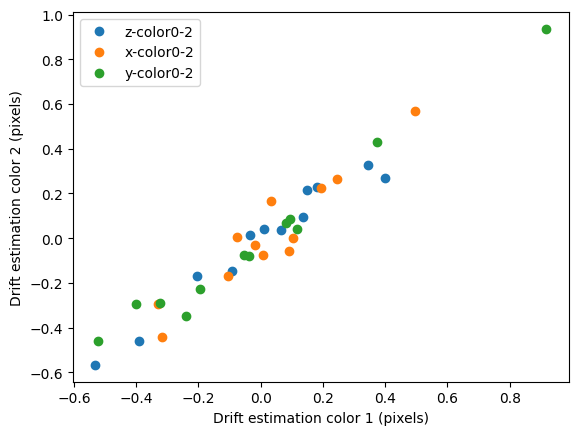

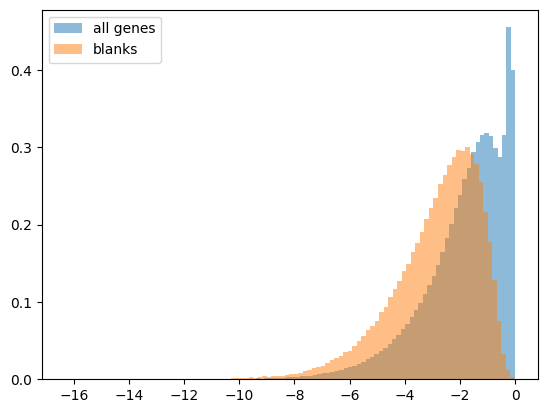

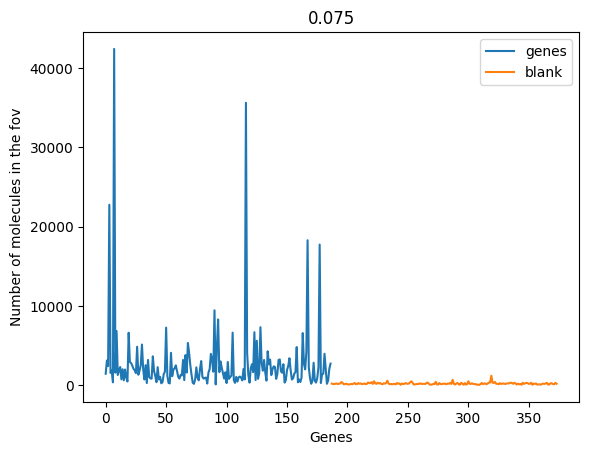

In [54]:
save_folder =r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group3'
#save_folder =r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group6'
#save_folder =r'\\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group5'
fov,set_ = 'Conv_zscan__30', '_set5'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols=2
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None)
dec.th=-1.5
plot_statistics(dec)

In [61]:
viewer = plot_multigenes(dec,genes=['RBFOX1','PLP1','TH'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=7)

In [55]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
print(list(np.array(dec.gns_names)[icds[np.argsort(ncds)[::-1]]]))

['APP', 'SLC17A7', 'ANK2', 'TUBB4A', 'VSNL1', 'RANGAP1', 'RBFOX1', 'SPOCK1', 'OLFM3', 'ATP1B1', 'SNCB', 'SATB2', 'CACNA1A', 'TUBA4A', 'SORT1', 'PLEC', 'CD81', 'RASGRF2', 'CASP7', 'TRPM3', 'STARD13', 'TUBB3', 'PAX6', 'PLP1', 'SLC32A1', 'XPO7', 'RAN', 'PLCH1', 'NUP205', 'TNPO3', 'RANBP3', 'TARDBP', 'SUN1', 'COX7A2L', 'PLA2G4C', 'TAFA2', 'SPTBN4', 'ADGRG1', 'PRKG1', 'RGPD2', 'ROBO1', 'CACNA1D', 'UNC13C', 'CACNA1H', 'SPTA1', 'ZNF385D', 'TUBB', 'TMEM132C', 'SLN', 'STK17B', 'CHAT', 'CD63', 'PLPP6', 'PDGFD', 'CASP10', 'TNC', 'AEBP1', 'SV2C', 'SYNE2', 'BAD', 'NUP54', 'TUBG1', 'POM121L2', 'VPS4B', 'RGPD3', 'SLIT2', 'PDE4B', 'ZNF295-AS1', 'CASP14', 'SLC11A1', 'RAE1', 'ZFPM2', 'PRELID2', 'SUN3', 'CD83', 'BRCA2', 'TUBB2B', 'C1QB', 'PCSK5', 'TMPO', 'TOR1AIP1', 'CASP3', 'APOC1', 'ATP6AP2', 'CCDC8', 'SPTBN2', 'NUP35', 'PDGFRA', 'TH', 'NXT2', 'RANBP3L', 'TPR', 'SMPD4', 'RGPD1', 'RMST', 'PLCXD3', 'SPTBN5', 'PVALB', 'ARL17B', 'THEMIS', 'ANLN', 'RGPD5', 'CASP6', 'SOX6', 'TOR4A', 'XPO4', 'ADAMTSL3', 'TAFA

In [29]:
#save_folder =r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group3'
#fov,set_ = 'Conv_zscan__30', '_set5'
#dec = decoder_simple(save_folder,fov,set_)

In [44]:
#save_folder =r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group5'
save_folder =r'\\192.168.0.96\bbfish124\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group5'
fov,set_ = 'Conv_zscan__30', '_set5'
dec = decoder_simple(save_folder,fov,set_)
check_image(dec)

Found files for fov: Conv_zscan__30.zarr ['\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H49_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H50_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H51_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H52_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H53_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H54_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H55_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H56_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H57_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H58_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H59_MER2col__set5', '\\\\192.168.0.96\\bbfish124\\HttHuman_Snonia__06_12_2023\\H60_MER2col__set5']


Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1499.5, 1499.5), zoom=0.3663833333333333, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=5, ndisplay=2, last_used=0, range=((0.0, 12.0, 1.0), (0.0, 3.0, 1.0), (0.0, 37.0, 1.0), (0.0, 3000.0, 1.0), (0.0, 3000.0, 1.0)), current_step=(6, 1, 18, 1500, 1500), order=(0, 1, 2, 3, 4), axis_labels=('0', '1', '2', '3', '4')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'im' at 0x1d21bc63700>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=Inter

In [50]:
icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
print(list(np.array(dec.gns_names)[icds[np.argsort(ncds)[::-1]]]))

['NEFM', 'ACTG1', 'AKAP6', 'HS6ST3', 'KCNC2', 'CBLN2', 'IPO5', 'CDH13', 'GRM5', 'ELAVL4', 'DST', 'NCAM2', 'ITPR1', 'CA10', 'CBX5', 'CNTNAP4', 'KPNA1', 'KCNIP2', 'HTT', 'CHMP2A', 'KPNB1', 'CNR1', 'MLIP', 'NDEL1', 'NEFH', 'CHMP1A', 'GLIS3', 'AQP4', 'HIF3A', 'ISG20', 'HOXA7', 'CXCL14', 'MRC1', 'KLHL1', 'NEAT1', 'GRIA1', 'EPHA6', 'FILIP1L', 'ELAVL2', 'CHMP3', 'B2M', 'C1QL3', 'NRG1', 'HHIPL1', 'DSG3', 'BCHE', 'KPNA3', 'NUP133', 'MYO18A', 'ADARB2', 'CSE1L', 'LRIG3', 'CDK20', 'GRID2', 'KIRREL3', 'HPSE2', 'GSX1', 'HOXD8', 'CSF1R', 'IPO9', 'COLEC12', 'CLEC5A', 'CAPN2', 'COL20A1', 'LPIN1', 'LINC01107', 'AHCTF1', 'BRAP', 'FTH1', 'GLRA3', 'CHMP6', 'LEMD2', 'FZD7', 'CYP4B1', 'FGF10', 'CBLN1', 'CD74', 'LMNTD1', 'DOCK8', 'FBN2', 'ADAMTSL1', 'CHMP5', 'NRM', 'APBB1IP', 'HSPB6', 'FREM2', 'NTNG1', 'CETN2', 'NKAIN2', 'DACH1', 'CCDC85A', 'ASIC2', 'FLT1', 'CDH3', 'ADGRV1', 'FAM150B', 'LMNA', 'NPSR1-AS1', 'ISX', 'CDH8', 'BCL2', 'BRIP1', 'ACTC', 'ADAMTS17', 'CP', 'MEPE', 'CCNJL', 'CHRNA2', 'FAM20A', 'BCAS1', 

In [51]:
viewer = plot_multigenes(dec,genes=['LMNA','LMNB1'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

In [9]:
viewer = plot_multigenes(dec,genes=['AQP4','KCNC2','NEFM','NUP133','NCAM2','HTT'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=20)

['NEFM', 'ACTG1', 'AKAP6', 'HS6ST3', 'KCNC2', 'CBLN2', 'IPO5', 'CDH13', 'GRM5', 'ELAVL4', 'DST', 'NCAM2', 'ITPR1', 'CA10', 'CBX5', 'CNTNAP4', 'KPNA1', 'KCNIP2', 'HTT', 'CHMP2A', 'KPNB1', 'CNR1', 'MLIP', 'NDEL1', 'NEFH', 'CHMP1A', 'GLIS3', 'AQP4', 'HIF3A', 'ISG20', 'HOXA7', 'CXCL14', 'MRC1', 'KLHL1', 'NEAT1', 'GRIA1', 'EPHA6', 'FILIP1L', 'ELAVL2', 'CHMP3', 'B2M', 'C1QL3', 'NRG1', 'HHIPL1', 'DSG3', 'BCHE', 'KPNA3', 'NUP133', 'MYO18A', 'ADARB2', 'CSE1L', 'LRIG3', 'CDK20', 'GRID2', 'KIRREL3', 'HPSE2', 'GSX1', 'HOXD8', 'CSF1R', 'IPO9', 'COLEC12', 'CLEC5A', 'CAPN2', 'COL20A1', 'LPIN1', 'LINC01107', 'AHCTF1', 'BRAP', 'FTH1', 'GLRA3', 'CHMP6', 'LEMD2', 'FZD7', 'CYP4B1', 'FGF10', 'CBLN1', 'CD74', 'LMNTD1', 'DOCK8', 'FBN2', 'ADAMTSL1', 'CHMP5', 'NRM', 'APBB1IP', 'HSPB6', 'FREM2', 'NTNG1', 'CETN2', 'NKAIN2', 'DACH1', 'CCDC85A', 'ASIC2', 'FLT1', 'CDH3', 'ADGRV1', 'FAM150B', 'LMNA', 'NPSR1-AS1', 'ISX', 'CDH8', 'BCL2', 'BRIP1', 'ACTC', 'ADAMTS17', 'CP', 'MEPE', 'CCNJL', 'CHRNA2', 'FAM20A', 'BCAS1', 

In [42]:
??plot_statistics

Signature: plot_statistics(dec)
Docstring: <no docstring>
Source:   
def plot_statistics(dec):
    if hasattr(dec,'im_segm_'):
        ncells = len(np.unique(dec.im_segm_))-1
    else:
        ncells = 1
    icds,ncds = np.unique(dec.icodesN[dec.scoreA>dec.th],return_counts=True)
    good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
    kp = np.in1d(icds,good_igns)
    ncds = ncds/ncells
    plt.figure()
    plt.xlabel('Genes')
    plt.plot(icds[kp],ncds[kp],label='genes')
    plt.plot(icds[~kp],ncds[~kp],label='blank')
    plt.ylabel('Number of molecules in the fov')
    plt.title(str(np.round(np.mean(ncds[~kp])/np.mean(ncds[kp]),3)))
    plt.legend()
File:      c:\scripts\nmerfish\iomicro.py
Type:      function

In [19]:
#np.unique(dec.XH_pruned[:,:,-1])

In [ ]:
if True:
    dec.XH_save = dec.XH.copy()
    keep_best_N_for_each_Readout(dec,Nkeep = 15000)
    dec.get_inters(dinstance_th=5,enforce_color=True)# enforce_color=False
    dec.get_icodes(nmin_bits=4,method = 'top4',norm_brightness=-1)
    apply_fine_drift(dec,plt_val=True)
    dec.XH = dec.XH_save.copy()
    R = dec.XH[:,-1].astype(int)
    dec.XH[:,:3] -= dec.drift_arr[R]

dec.get_inters(dinstance_th=2,enforce_color=True)# enforce_color=False
dec.get_icodes(nmin_bits=4,method = 'top4',norm_brightness=None,nbits=24,is_unique=False)

### Pick a few calibration FOVs

Loaded decoded: -0.01915764808654785


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.24it/s]


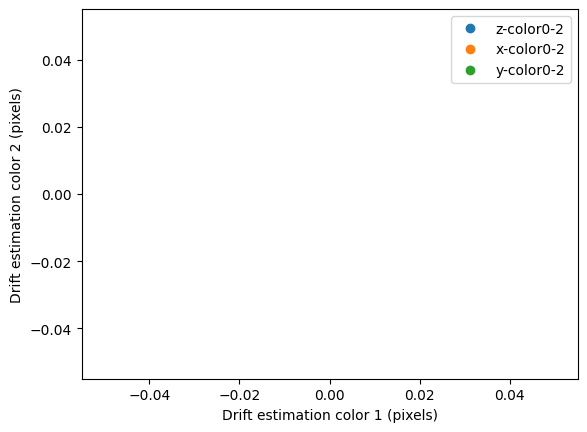

In [7]:
save_folder =r'\\192.168.0.21\bbfishdc21\HttHuman_Snonia__06_12_2023\MERFISH_Analysis_group1'
fov,set_ = 'Conv_zscan__30', '_set5'
dec = decoder_simple(save_folder,fov,set_)
dec.ncols=2
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)

In [ ]:
if False:
    if scoresRef is None: scoresRef=scoresRefT
    else: combine_scoresRef(scoresRef,scoresRefT)
    np.save(save_folder+os.sep+'scoresRef.npy',scoresRef)

### Given the base decoding for each fov, run across all datasets with consistent values

In [ ]:
from ioMicro import *
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
scoresRef = np.load(save_folder+os.sep+'scoresRef.npy',allow_pickle=True)

In [ ]:
#elems = [('Conv_zscan__'+str(ifov).zfill(3),'_'+set_)for set_ in ['set2'] for ifov in dic_f[set_]]
for fov,set_ in tqdm(elems):
    save_final_decoding(save_folder,fov,set_,scoresRef,th=-1.5,plt_val=False,
                            tags_smFISH=['Aldh','Sox11'],
                            genes_smFISH=[['Igfbpl1','Aldh1l1','Ptbp1'],['Sox11','Sox2','Dcx']],Hths=None,force=True)

### Get counts per cell into a single dataset

In [ ]:
import pandas as pd
save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
#save_folder =r'\\192.168.0.6\bbfish1e3\DCBBL1_03_14_2023_big\MERFISH_Analysis'
save_fls = glob.glob(save_folder+os.sep+'finaldecs_*')

In [ ]:
save_fls_ = [fl for fl in save_fls if ('_set5' in fl)]# in fl if '035' in fl][0]
cell_df,df=None,None
for save_fl in tqdm(np.sort(save_fls_)[:]):
    ### load info
    dic = np.load(save_fl)
    XF = dic['XF']
    header = list(dic['header'])
    genes_decoded = dic['genes']
    cells = dic['cellinfo'][1:]
    header_cells = dic['header_cells']
    ### Rethrehold based on score
    iscore = list(header).index('score')
    scoreA = XF[:,iscore]
    keep = scoreA>-1.5
    ugns,gns_i = np.unique(genes_decoded[keep],return_inverse=True)

    icell = header.index('cell_id')
    icells = XF[keep,icell].astype(int)
    
    icellsf = cells[:,0].astype(int)
    
    mcell = np.max(icellsf)+1
    gn_cell,gn_cell_cts = np.unique(mcell*gns_i+icells,return_counts=True)
    len(gn_cell)
    igns_ = gn_cell//mcell
    icells_ = gn_cell%mcell
    Mcts = np.zeros([mcell,len(ugns)])
    Mcts[icells_,igns_]=gn_cell_cts

    Mcts[icellsf].shape
    ifov,iset = int(XF[0,header.index('ifov')]),int(XF[0,header.index('iset')])
    icellsnm = [icell+10**5*ifov for icell in icellsf]#icellsnm = [icell+10**5*ifov+10**9*iset for icell in icellsf]

    dfT = pd.DataFrame(Mcts[icellsf],columns=ugns,index=icellsnm)


    df = dfT if df is None else pd.concat([df,dfT])
    cell_dfT = pd.DataFrame(cells,columns=header_cells,index=icellsnm)
    cell_df = cell_dfT if cell_df is None else pd.concat([cell_df,cell_dfT])